In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import swifter

In [3]:
data = pd.read_csv("D:/Reviews.csv")

In [4]:
data.head()

,product,title,rating,body,Unnamed: 0
0,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",Please dont buy if you face these circumstances,1.0,"Day 1: Headphones came, sounds great, google ...",NaN
1,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",JBL loyalists would cherish,5.0,"Recommended as commuter headphones, not as muc...",NaN
2,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...","Excellent sound, long battery life.",4.0,Pre-ordered the product on 8th June when Amazo...,NaN
3,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",All round package,5.0,Lets try:1) sound quality is pretty good. Don'...,NaN
4,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",Nothing special!,3.0,I felt like this was no better than a 1000rs h...,NaN


In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,product,title,rating,body
0,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",Please dont buy if you face these circumstances,1.0,"Day 1: Headphones came, sounds great, google ..."
1,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",JBL loyalists would cherish,5.0,"Recommended as commuter headphones, not as muc..."
2,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...","Excellent sound, long battery life.",4.0,Pre-ordered the product on 8th June when Amazo...
3,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",All round package,5.0,Lets try:1) sound quality is pretty good. Don'...
4,"Amazon.in:Customer reviews: JBL Live 660NC, Sm...",Nothing special!,3.0,I felt like this was no better than a 1000rs h...


In [7]:
data.shape

(667930, 4)

In [8]:
def mis_col(x):
    missing = pd.DataFrame((x.isnull().sum()/len(x))*100,columns = ['percent'])
    missing = missing[missing['percent']>0]
    return missing

In [9]:
mis_col(data)

,percent
title,0.007037
rating,0.000150
body,0.934679


In [10]:
data.dropna(inplace=True,axis=0)

In [11]:
mis_col(data)

,percent


In [12]:
data.dtypes

product     object
title       object
rating     float64
body        object
dtype: object

In [13]:
data.drop('product',axis=1,inplace=True)

In [14]:
data.dtypes

title      object
rating    float64
body       object
dtype: object

In [15]:
def clean(text):
    text = text.lower()
    users = re.findall('@\w+',text) ## extracted users 
    links = re.findall('http[a-z0-9://.]+',text) ## extracted urls
    hastags = re.findall('#[a-z0-9://.]+',text) ## extract #tags
    replace_terms = []
    replace_terms.extend(links)
    replace_terms.extend(users)
    replace_terms.extend(hastags)
    for t in replace_terms:
        text = re.sub(t,'',text)
    text = " ".join([t for t in re.findall('\w+',text) if len(t) > 2])
    return text

In [16]:
data["body"] = data["body"].swifter.apply(clean)

Pandas Apply:   0%|          | 0/661665 [00:00<?, ?it/s]

In [17]:
data["title"] = data["title"].swifter.apply(clean)

Pandas Apply:   0%|          | 0/661665 [00:00<?, ?it/s]

In [18]:
data.head()

,title,rating,body
0,please dont buy you face these circumstances,1.0,day headphones came sounds great google assist...
1,jbl loyalists would cherish,5.0,recommended commuter headphones not much for h...
2,excellent sound long battery life,4.0,pre ordered the product 8th june when amazon l...
3,all round package,5.0,lets try sound quality pretty good don fiddle ...
4,nothing special,3.0,felt like this was better than 1000rs headphon...


In [19]:
data

,title,rating,body
0,please dont buy you face these circumstances,1.0,day headphones came sounds great google assist...
1,jbl loyalists would cherish,5.0,recommended commuter headphones not much for h...
2,excellent sound long battery life,4.0,pre ordered the product 8th june when amazon l...
3,all round package,5.0,lets try sound quality pretty good don fiddle ...
4,nothing special,3.0,felt like this was better than 1000rs headphon...
...,...,...,...
667924,making lot noise the installation was not mark,2.0,coz noise
667925,copper pipe box costing you extra 2600 during ...,1.0,good but the remote battery were dead when del...
667927,nice product,5.0,product the mark
667928,waste money,1.0,yes also faced the same problem after months w...


In [20]:
from sklearn.metrics import *
from imblearn.pipeline import *
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import *
from xgboost import XGBClassifier
from sklearn.preprocessing import *
from imblearn.over_sampling import *
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
x=data.drop('rating',axis=1)
y=data['rating']

In [22]:
x['content'] = x['title']+' '+x['body']

In [23]:
x.drop(['title','body'],axis=1,inplace=True)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=111)

In [25]:
x_train.head()

,content
644076,value for money very good scrolling and having...
55109,got the box very damaged first all the seal th...
492136,excellent phone from amazon thank you soo much...
491180,ghatiya ghatiya
377698,mis guide product dikhaya kuch diya kuch withaout


In [26]:
y_train.head()

644076    5.0
55109     4.0
492136    5.0
491180    4.0
377698    1.0
Name: rating, dtype: float64

In [27]:
cv = CountVectorizer(min_df=0.2,max_df=0.9)

In [28]:
df = cv.fit_transform(x_train['content'])
df1 = cv.transform(x_test['content'])

In [29]:
df.dtype

dtype('int64')

In [30]:
df1.dtype

dtype('int64')

In [31]:
model = LinearSVC()
model.fit(df,y_train)

y_train_pred = model.predict(df)
y_test_pred = model.predict(df1)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

Train performance:
              precision    recall  f1-score   support

         1.0       0.53      0.53      0.53    107496
         2.0       0.18      0.00      0.00     28808
         3.0       0.03      0.00      0.00     30671
         4.0       0.47      0.12      0.19     93248
         5.0       0.54      0.88      0.67    202942

    accuracy                           0.53    463165
   macro avg       0.35      0.31      0.28    463165
weighted avg       0.47      0.53      0.46    463165

Test performance:
              precision    recall  f1-score   support

         1.0       0.53      0.53      0.53     45733
         2.0       0.11      0.00      0.00     12365
         3.0       0.04      0.00      0.00     13016
         4.0       0.47      0.13      0.20     40455
         5.0       0.54      0.87      0.67     86931

    accuracy                           0.53    198500
   macro avg       0.34      0.31      0.28    198500
weighted avg       0.46      0.53      0

In [32]:
cv1 = CountVectorizer()

In [33]:
df2 = cv1.fit_transform(x_train['content'])
df3 = cv1.transform(x_test['content'])

In [34]:
df2

<463165x68655 sparse matrix of type '<class 'numpy.int64'>'
	with 13972035 stored elements in Compressed Sparse Row format>

In [35]:
df3

<198500x68655 sparse matrix of type '<class 'numpy.int64'>'
	with 5986673 stored elements in Compressed Sparse Row format>

In [36]:
model1 = LinearSVC()
model1.fit(df2,y_train)

y_train_pred = model1.predict(df2)
y_test_pred = model1.predict(df3)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

Train performance:
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94    107496
         2.0       0.95      0.77      0.85     28808
         3.0       0.88      0.66      0.75     30671
         4.0       0.88      0.66      0.76     93248
         5.0       0.85      0.97      0.91    202942

    accuracy                           0.88    463165
   macro avg       0.89      0.81      0.84    463165
weighted avg       0.88      0.88      0.87    463165

Test performance:
              precision    recall  f1-score   support

         1.0       0.88      0.93      0.91     45733
         2.0       0.85      0.68      0.75     12365
         3.0       0.72      0.51      0.60     13016
         4.0       0.79      0.59      0.68     40455
         5.0       0.82      0.95      0.88     86931

    accuracy                           0.83    198500
   macro avg       0.81      0.73      0.76    198500
weighted avg       0.82      0.83      0

In [56]:
model6 = make_pipeline(RandomOverSampler(),LinearSVC())
model6.fit(df2,y_train)

y_train_pred = model6.predict(df2)
y_test_pred = model6.predict(df3)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

Train performance:
              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94    107496
         2.0       0.80      0.86      0.83     28808
         3.0       0.63      0.83      0.71     30671
         4.0       0.76      0.75      0.76     93248
         5.0       0.91      0.88      0.89    202942

    accuracy                           0.86    463165
   macro avg       0.81      0.85      0.83    463165
weighted avg       0.87      0.86      0.86    463165

Test performance:
              precision    recall  f1-score   support

         1.0       0.92      0.87      0.90     45733
         2.0       0.66      0.74      0.70     12365
         3.0       0.49      0.67      0.56     13016
         4.0       0.69      0.68      0.68     40455
         5.0       0.88      0.85      0.86     86931

    accuracy                           0.80    198500
   macro avg       0.73      0.76      0.74    198500
weighted avg       0.81      0.80      0

In [37]:
model2 = GaussianNB()
model2.fit(df.A,y_train)

y_train_pred = model2.predict(df.A)
y_test_pred = model2.predict(df1.A)

print("Train Performance:")
print(classification_report(y_train,y_train_pred))
print("Test Perfromance:")
print(classification_report(y_test,y_test_pred))

Train Performance:
              precision    recall  f1-score   support

         1.0       0.37      0.76      0.50    107496
         2.0       0.18      0.11      0.13     28808
         3.0       0.17      0.20      0.18     30671
         4.0       0.37      0.11      0.17     93248
         5.0       0.55      0.42      0.48    202942

    accuracy                           0.41    463165
   macro avg       0.33      0.32      0.29    463165
weighted avg       0.42      0.41      0.38    463165

Test Perfromance:
              precision    recall  f1-score   support

         1.0       0.36      0.75      0.49     45733
         2.0       0.19      0.11      0.14     12365
         3.0       0.17      0.20      0.18     13016
         4.0       0.37      0.12      0.18     40455
         5.0       0.54      0.42      0.47     86931

    accuracy                           0.40    198500
   macro avg       0.33      0.32      0.29    198500
weighted avg       0.42      0.40      0

In [38]:
model4 = make_pipeline(RandomOverSampler(),XGBClassifier(tree_method='gpu_hist',gpu_id=0))
model4.fit(df2,y_train)

y_train_proba = model4.predict_proba(df2)[:,1]
y_test_proba = model4.predict_proba(df3)[:,1]

y_train_pred = model4.predict(df2)
y_test_pred = model4.predict(df3)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

[11:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train performance:
              precision    recall  f1-score   support

         1.0       0.93      0.85      0.89    107496
         2.0       0.74      0.71      0.72     28808
         3.0       0.43      0.75      0.55     30671
         4.0       0.66      0.69      0.68     93248
         5.0       0.88      0.82      0.85    202942

    accuracy                           0.79    463165
   macro avg       0.73      0.76      0.74    463165
weighted avg       0.81      0.79      0.80    463165

Test performance:
              precision    recall  f1-score   support

         1.0       0.93      0.84      0.88     45733
         2.0       0.70      0.67      0.69     12365


In [39]:
model5 = XGBClassifier(tree_method='gpu_hist',gpu_id=0)
model5.fit(df2,y_train)

y_train_proba = model5.predict_proba(df2)[:,1]
y_test_proba = model5.predict_proba(df3)[:,1]

y_train_pred = model5.predict(df2)
y_test_pred = model5.predict(df3)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

[11:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train performance:
              precision    recall  f1-score   support

         1.0       0.85      0.94      0.89    107496
         2.0       0.97      0.61      0.75     28808
         3.0       0.78      0.48      0.59     30671
         4.0       0.81      0.56      0.66     93248
         5.0       0.80      0.96      0.87    202942

    accuracy                           0.82    463165
   macro avg       0.84      0.71      0.75    463165
weighted avg       0.82      0.82      0.81    463165

Test performance:
              precision    recall  f1-score   support

         1.0       0.84      0.94      0.89     45733
         2.0       0.96      0.60      0.74     12365


In [52]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
from wordcloud import WordCloud

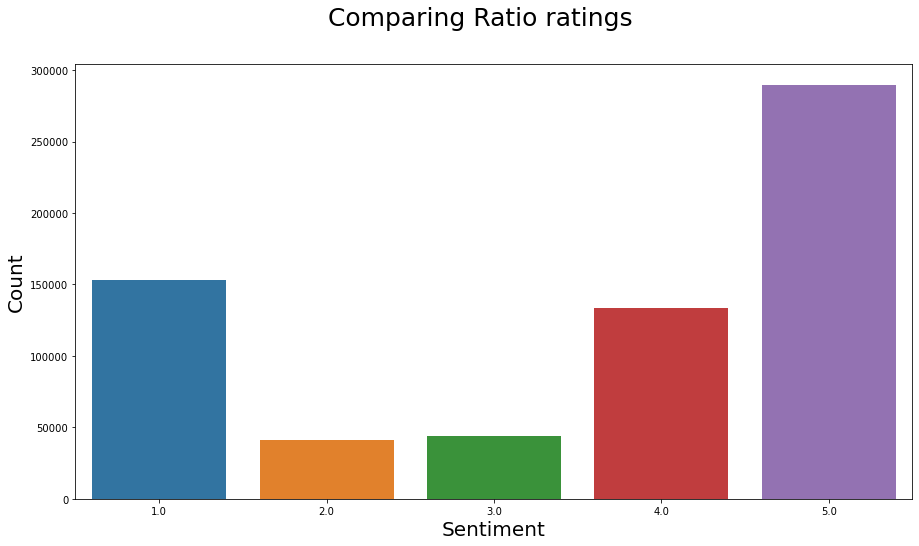

In [40]:
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio ratings", fontsize = 25)
sns.countplot(x = "rating", data = data)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
plt.show()

In [53]:
stopwords = set(stopwords.words('english'))
def word_cloud(data, title):
    wordcloud = WordCloud(background_color = "black",max_font_size = 40,max_words = 200,stopwords = stopwords,scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [49]:
One=data[data["rating"] == 1.0]["body"]
Two=data[data["rating"] == 2.0]["body"]
Three=data[data["rating"] == 3.0]["body"]
Four=data[data["rating"] == 4.0]["body"]
Five=data[data["rating"] == 5.0]["body"]

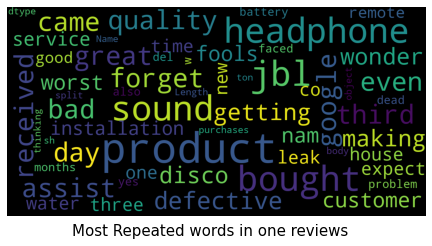

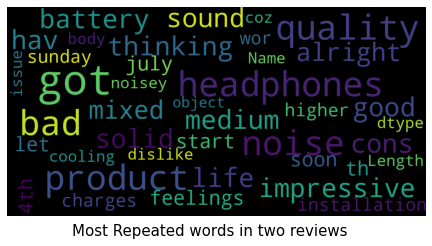

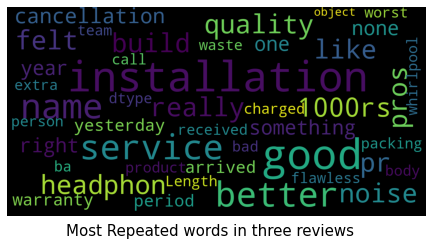

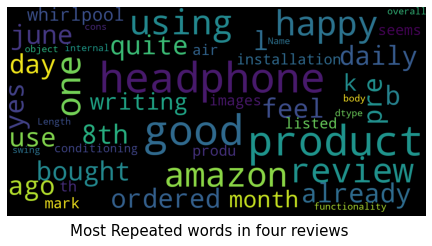

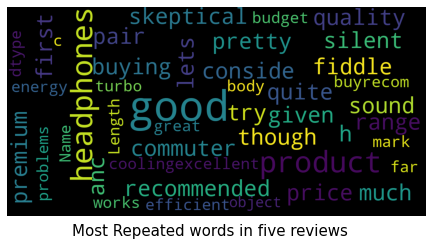

In [55]:
word_cloud(One, "Most Repeated words in one reviews")
word_cloud(Two, "Most Repeated words in two reviews")
word_cloud(Three, "Most Repeated words in three reviews")
word_cloud(Four, "Most Repeated words in four reviews")
word_cloud(Five, "Most Repeated words in five reviews")

### Select the model1

In [47]:
import pickle

In [49]:
# save the countvectorizer to disk
filename = 'finalized_vectorizer.sav'
pickle.dump(cv1, open(filename, 'wb'))
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))